# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
!pip install black

%load_ext black
!pip install --upgrade scikit-learn

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    #plot_confusion_matrix,
    make_scorer,
)


The black module is not an IPython extension.


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loan_data = pd.read_csv('/content/drive/MyDrive/supervised learning/project/Loan_Modelling.csv')
df = loan_data.copy()
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


## Data Overview

* Observations
* Sanity checks

In [ ]:
df.shape

(5000, 14)

In [ ]:
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The data set contains 5000 rows and 14 columns,  all columns are numerical (including ones that are actually categorical - customer id, zipcode, education, personal loan, securities, CD, Online, CreditCard)
* There are no missing values
* There are no duplicate rows
* Average customer is about 45 years old
* Minimum professions experience is -3 years, which is likely a data entry error.
* Income ranges for 8 to 224 thousand dollars
* Family size ranges from 1 to 4 family members
* Average monthly credit card spend is about 2k
* Most of the customers in the data set don't have a mortgage


In [ ]:
# Customer Id is practically the same as index (just starts at 1 instead of zero), and can be safely dropped
df = df.drop('ID', axis=1)

In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df_neg_experience = df[df['Experience']<0]
df_neg_experience.shape

(52, 13)

In [ ]:
df_neg_experience.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [ ]:
df_neg_experience.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIPCode,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal_Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0
Securities_Account,52.0,0.115385,0.322603,0.0,0.00,0.0,0.000,1.0


There are 52 rows containing negative number for professional experience. Income for such customers ranges from 12 to 150k. Since customers have income we will treat these as typos and change them from negative to positive numbers.

In [ ]:
df_neg_experience['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [ ]:
df["Experience"].replace(-1, 1, inplace=True)
df["Experience"].replace(-2, 2, inplace=True)
df["Experience"].replace(-3, 3, inplace=True)

Now let's convert type of the categorical columns from numerical to object

In [ ]:
cat_cols = [
     "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard"
]
df[cat_cols] = df[cat_cols].astype('category')

Let's replace values in the categorical columns with actual values for readability

In [ ]:
replaceStruct = {
                'Education':     {1: 'Undergrad', 2: 'Graduate' ,3: 'Advanced/Professional'},
                'Personal_Loan': {0: 'No', 1:'Yes'},
                'Securities_Account': {0: 'No', 1:'Yes'},
                'CD_Account': {0: 'No', 1:'Yes'},
                'Online': {0: 'No', 1:'Yes'},
                'CreditCard': {0: 'No', 1:'Yes'},
                    }
df=df.replace(replaceStruct)

In [ ]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,No,Yes,No,No,No
1,45,19,34,90089,3,1.5,Undergrad,0,No,Yes,No,No,No
2,39,15,11,94720,1,1.0,Undergrad,0,No,No,No,No,No
3,35,9,100,94112,1,2.7,Graduate,0,No,No,No,No,No
4,35,8,45,91330,4,1.0,Graduate,0,No,No,No,No,Yes


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [ ]:
# function to create histogram boxplots


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, xtick_rotation=90):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=xtick_rotation, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Univariate Analysis

### Observations on Age

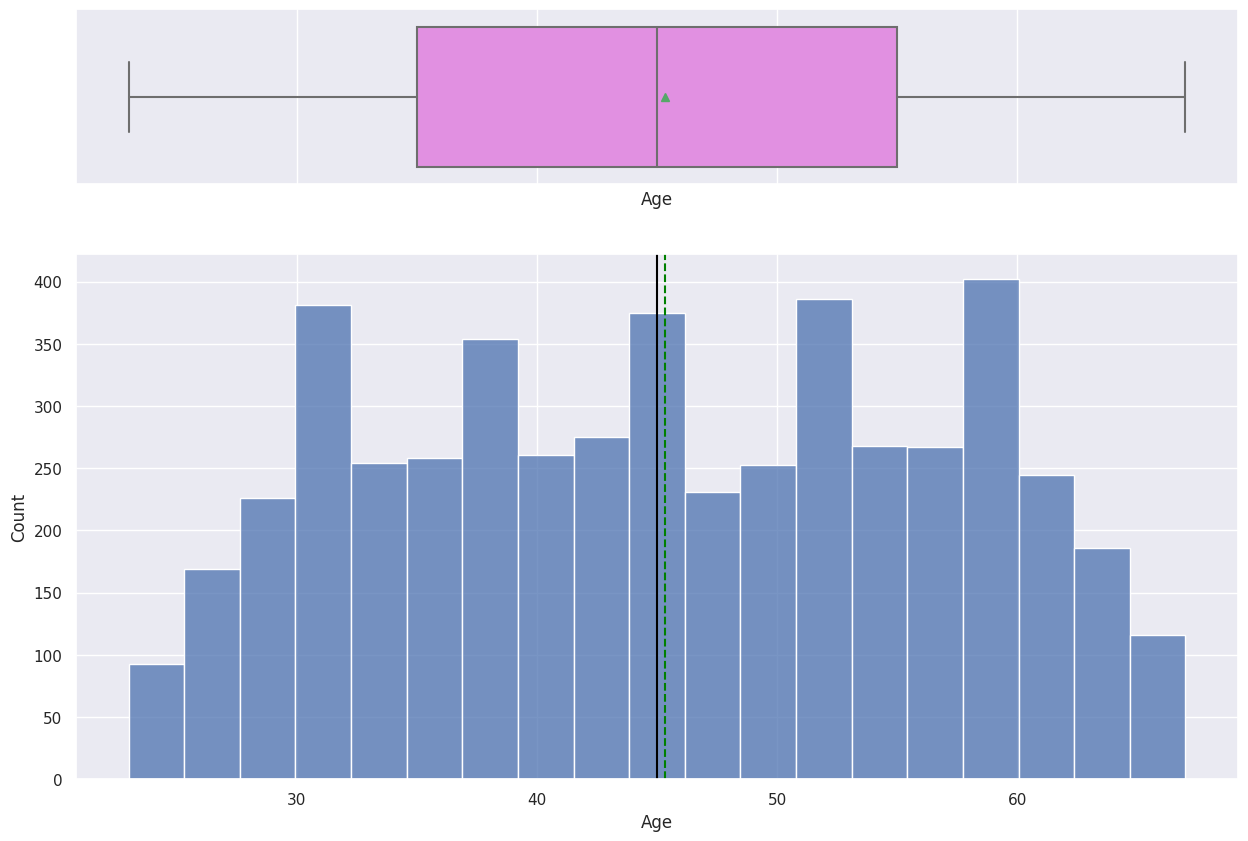

In [ ]:
histogram_boxplot(df, "Age")

In [ ]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

* Customer Age is normally distributed
* There are no outliers in this column
* Average customer is about 45 years old
* Customers range from 23 years old to 67

### Observations on Experience

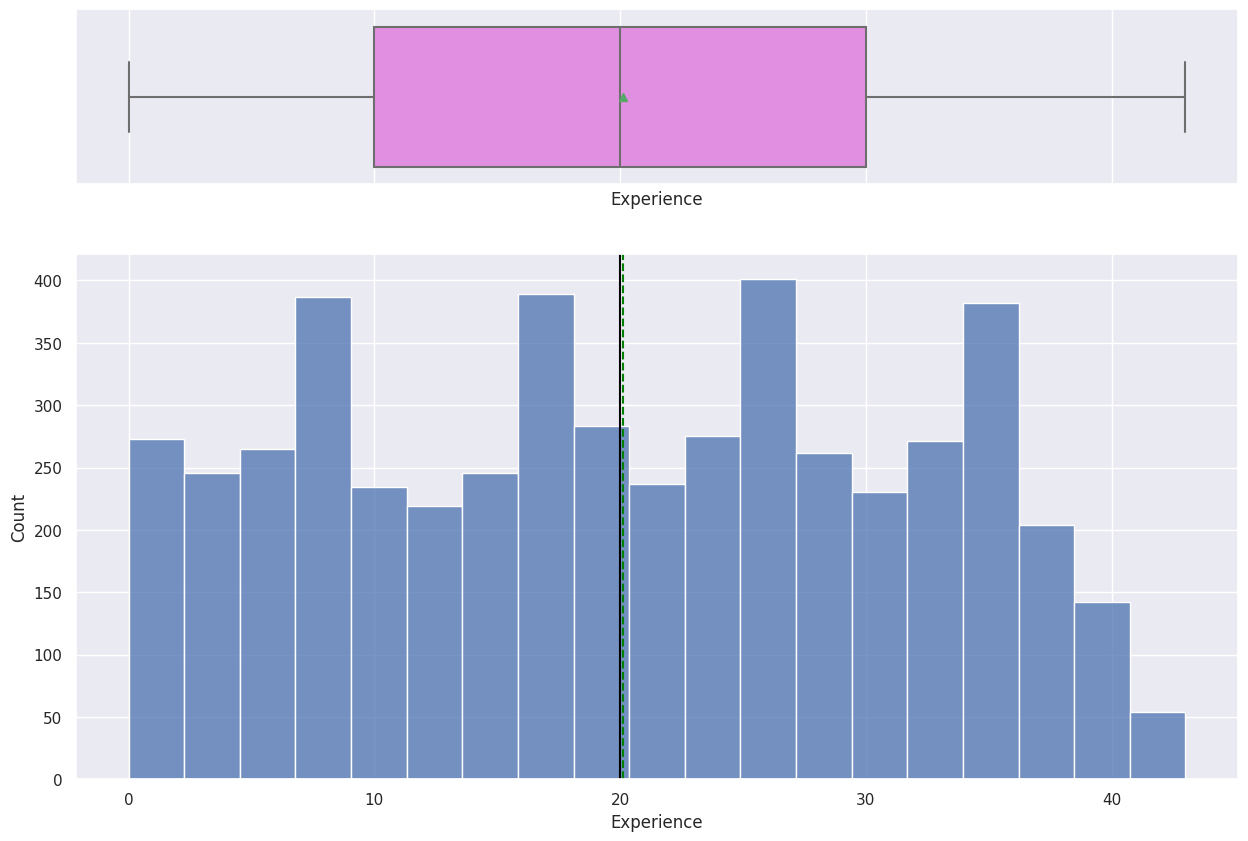

In [ ]:
histogram_boxplot(df, "Experience")

In [ ]:
df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

* There are no outliers in this column
* Professional experience is normally distributed
* Average customer has 20 years of professional experience.

### Observations on Income

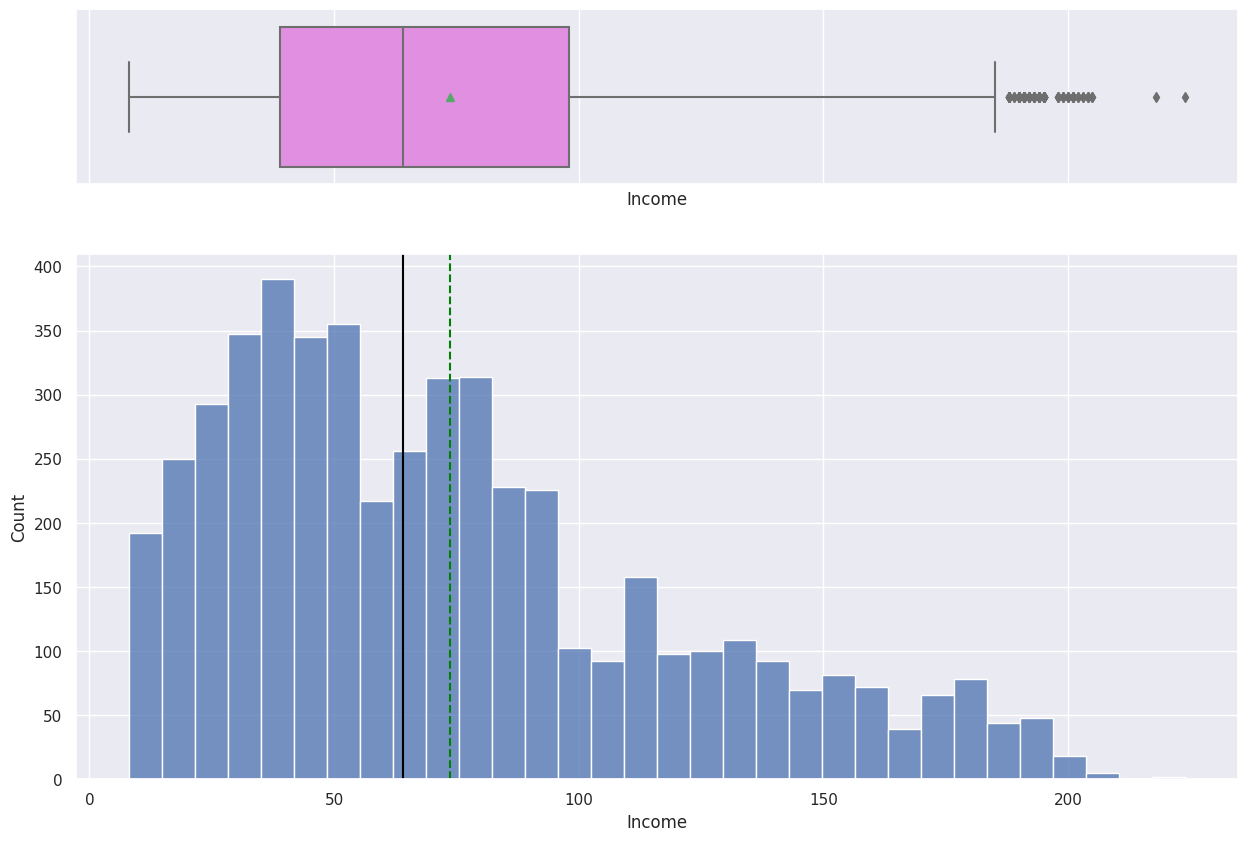

In [ ]:
histogram_boxplot(df, "Income")

In [ ]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

* Income is a right skewed distribution
* There are outliers in this column
* 75% of the customers make less than 98 thousand dollars a year

### Observations on Zip Code

In [ ]:
df['ZIPCode'].nunique()

467

In [ ]:
df['ZIPCode'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
93077      1
94965      1
90068      1
94970      1
91024      1
Name: ZIPCode, Length: 467, dtype: int64

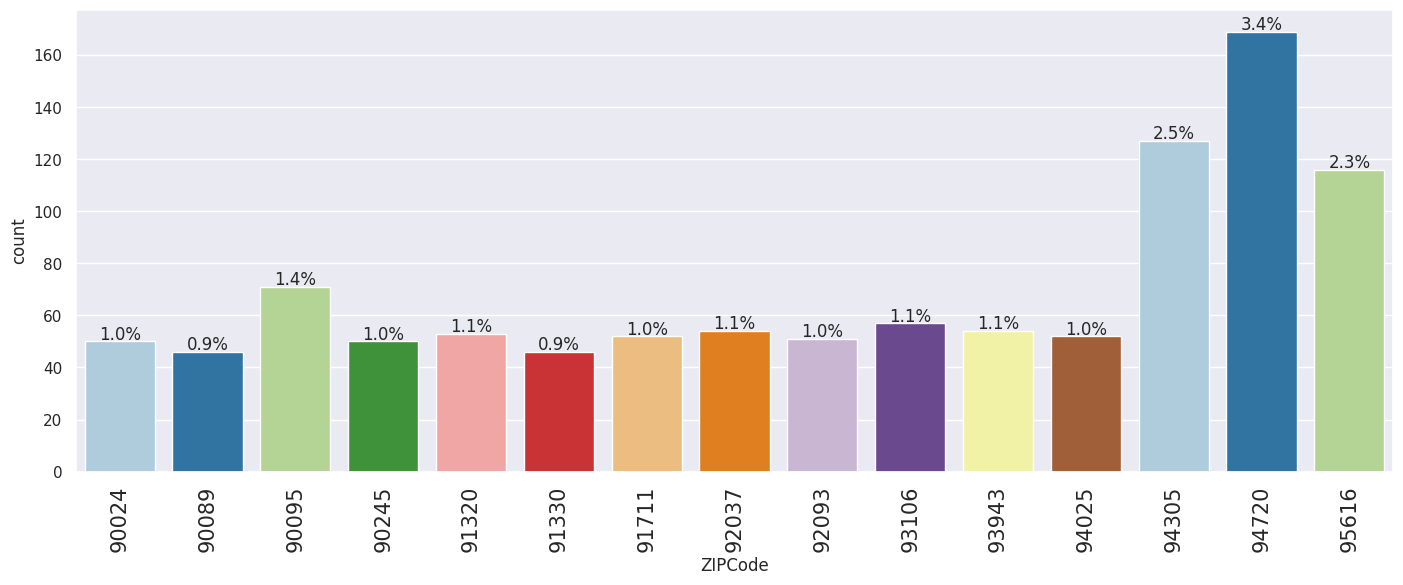

In [ ]:
labeled_barplot(df, "ZIPCode", perc=True, n=15)

* There are 467 zipcodes in the data set
* About 10% of the customers live in four zipcodes: 94720, 95616, 94305, 90095

### Observations on Family size

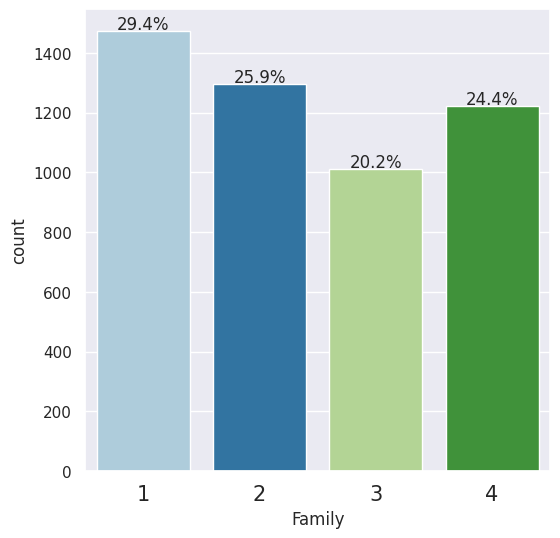

In [ ]:
labeled_barplot(df, "Family", perc=True, xtick_rotation=0)

* About 30% of customers are single
* Maximum family size in the data set is 4, 24% of customers belong to that category

### Observations on CCAvg

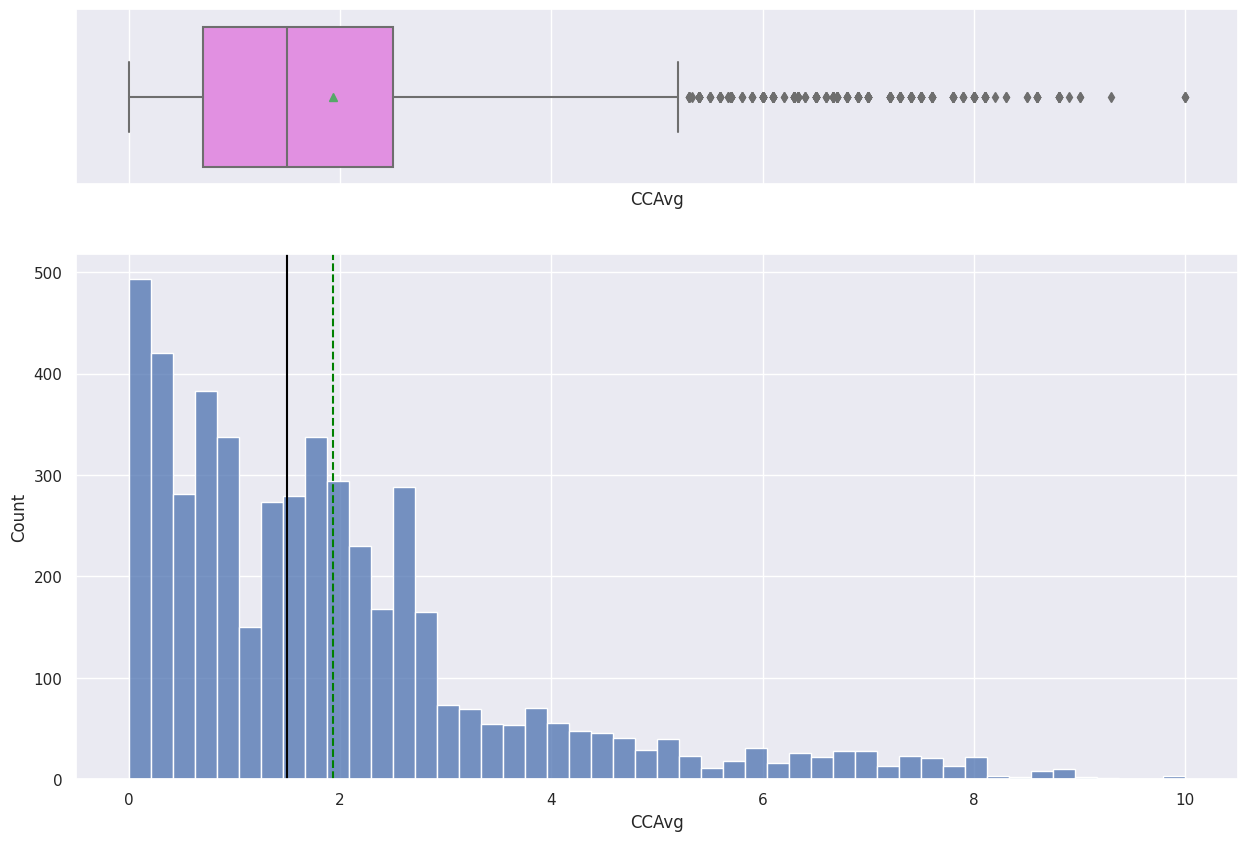

In [ ]:
histogram_boxplot(df, "CCAvg")

In [ ]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [ ]:
df[df['CCAvg'] == 0]['CCAvg'].count()

106

* CCAvg is a right-skewed distribution
* This column contains outliers
* Maximum credit card spend is 10k per month
* There are 106 customers with zero credit card spend
* 50% of the customers spend less than 1.5k per month using credit cards

### Observations on Education

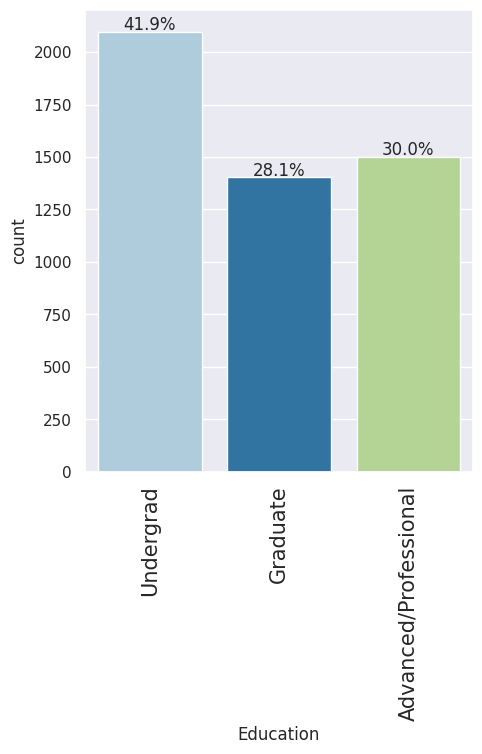

In [ ]:
labeled_barplot(df, "Education", perc=True)

* 70% of customers have a college degree, 28% of them have a graduate degree
* 30% of customers have Professional education

### Observations on Mortgage

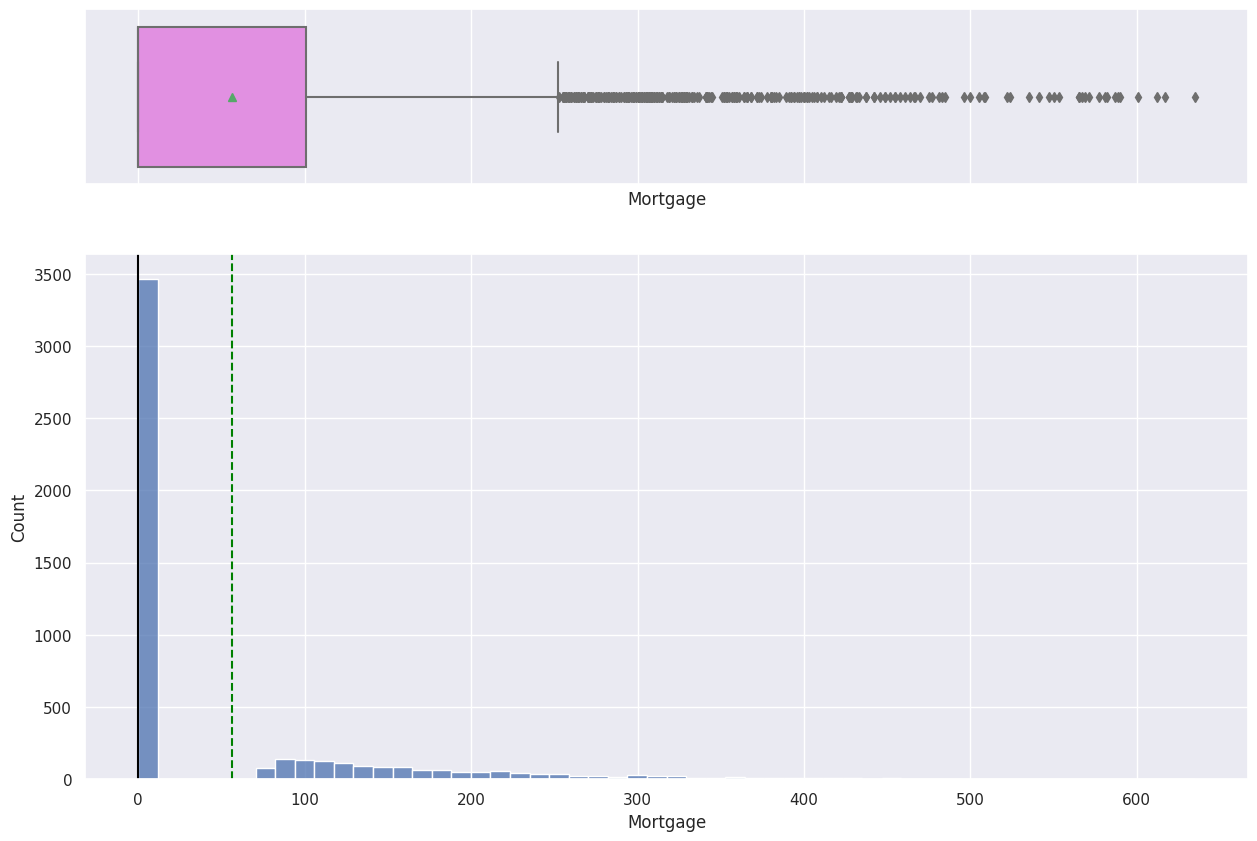

In [ ]:
histogram_boxplot(df, "Mortgage")

In [ ]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

In [ ]:
df[df['Mortgage'] != 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1538.0,45.174252,11.428636,23.0,35.0,45.0,55.0,67.0
Experience,1538.0,19.979194,11.381403,0.0,10.0,20.0,30.0,43.0
Income,1538.0,73.519506,47.303722,8.0,38.0,62.0,98.0,205.0
Family,1538.0,2.405072,1.138045,1.0,1.0,2.0,3.0,4.0
CCAvg,1538.0,1.908056,1.744524,0.0,0.7,1.5,2.5,9.0
Mortgage,1538.0,183.676203,101.361226,75.0,109.0,153.0,227.0,635.0


In [ ]:
df[df['Mortgage'] != 0].shape[0]/df.shape[0]*100

30.759999999999998

* This is a right skewed distribution
* The column contains a lot of outliers
* Only ~31% of customers have a mortgage
* Mortgage ranges from 23k to 635k
* Youngest customers with a mortgage are 23 years old
* Smallest mortgage is 75k
* Median income for customers with a mortgage is 62k

### Observations on Personal Loan

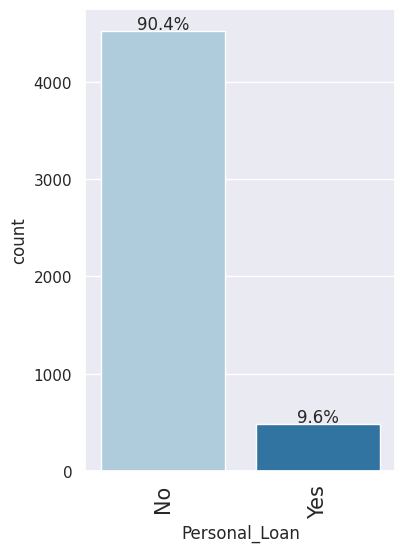

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

* 90% of the customers do not have a personal loan with the bank

### Observations on Securities Account

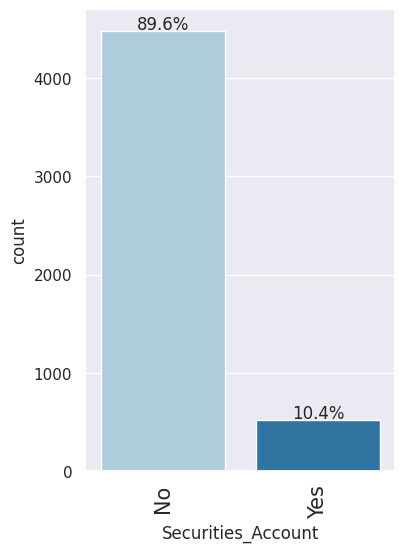

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True)

* Most of the customers (89.6%) don't have securities account with the bank

### Observations on CD Account

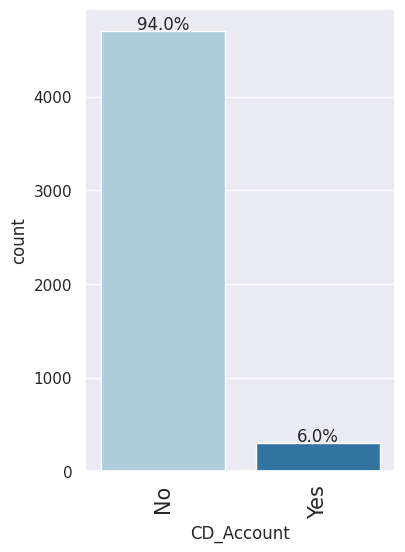

In [ ]:
labeled_barplot(df, "CD_Account", perc=True)

* 94% of customers don't have a CD account with the bank

### Observations on Online Usage

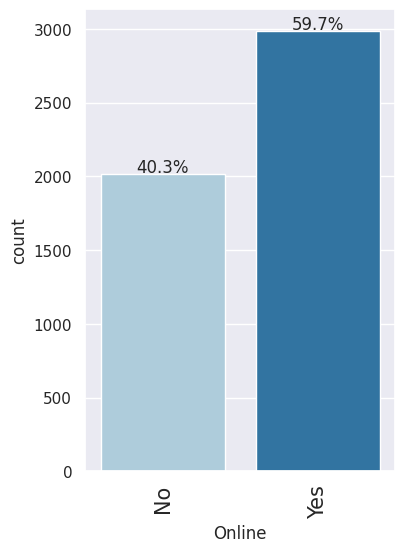

In [ ]:
labeled_barplot(df, "Online", perc=True)

* 40% of the customers do not use online banking (quite surprizing in this day and age)

### Observations on Credit Cards issued by other banks

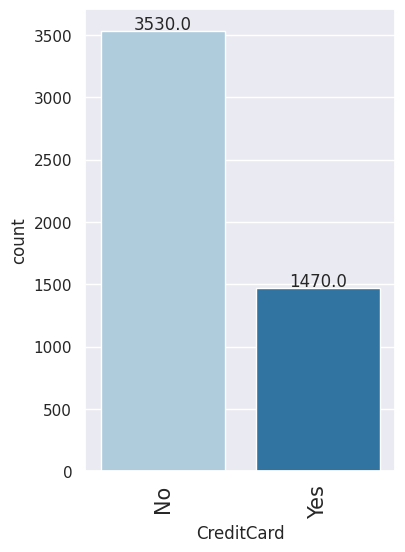

In [ ]:
labeled_barplot(df, "CreditCard")

* 3530 customers (70%) do not have credit cards with other banks
* 1470 customers do have credit cards with other banks

## Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Correlation

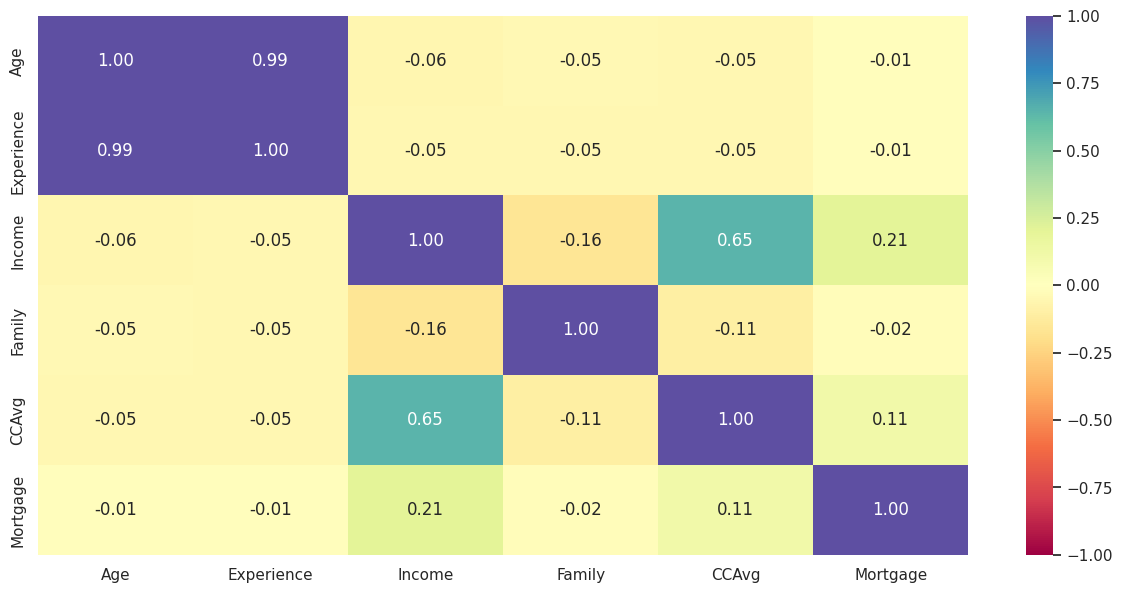

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f",cmap="Spectral")
plt.show()

* Professional expririence is strongly positively correlated with age
* Income is positively correlated with Average Credit Card spend (CCAvg)
* There is a weak positive correlation between Income and Mortgage, and Mortgage and CCAvg
* Family size if weakly negatively correlated with Income and CCAvg

### Personal_Loan vs Zip Code

In [ ]:
top_zipcodes = df['ZIPCode'].value_counts().head(10).index.tolist()

Personal_Loan   No  Yes  All
ZIPCode                     
All            736   69  805
94720          150   19  169
94305          114   13  127
90095           63    8   71
95616          110    6  116
92037           49    5   54
91711           48    4   52
93106           53    4   57
93943           50    4   54
94025           48    4   52
91320           51    2   53
------------------------------------------------------------------------------------------------------------------------


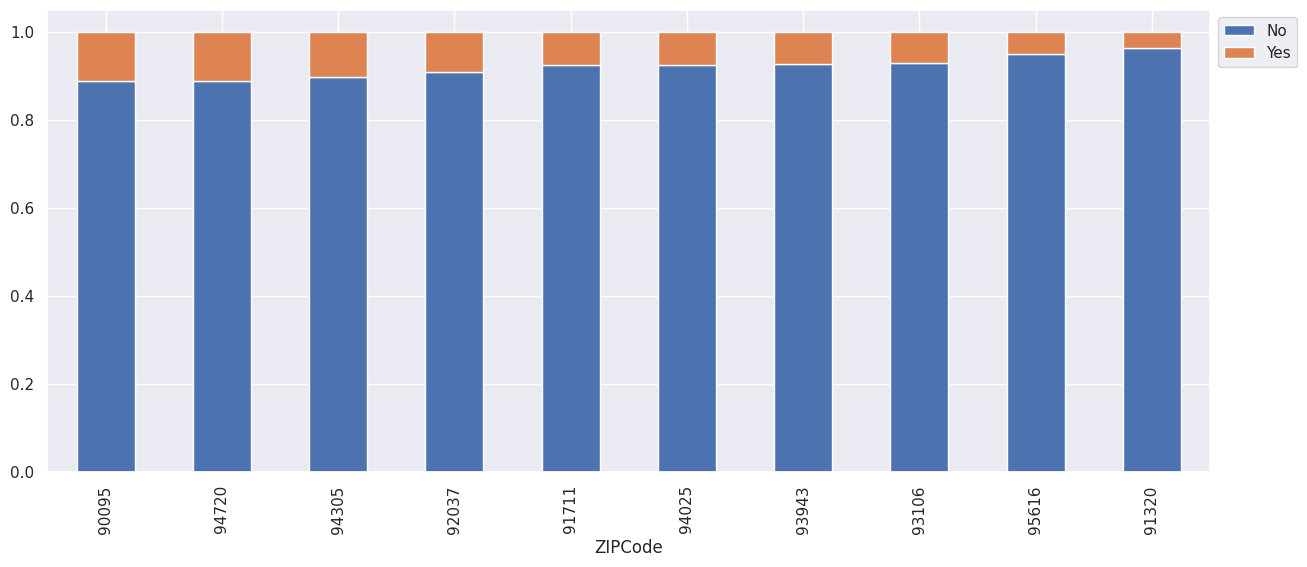

In [ ]:
stacked_barplot(df[df['ZIPCode'].isin(top_zipcodes)], "ZIPCode", "Personal_Loan")

In [ ]:
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    df["ZIPCode"].astype(str).str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].astype(str).str[0:2].astype('category')

Number of unique values if we take first two digits of ZIPCode:  7


Personal_Loan    No  Yes   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


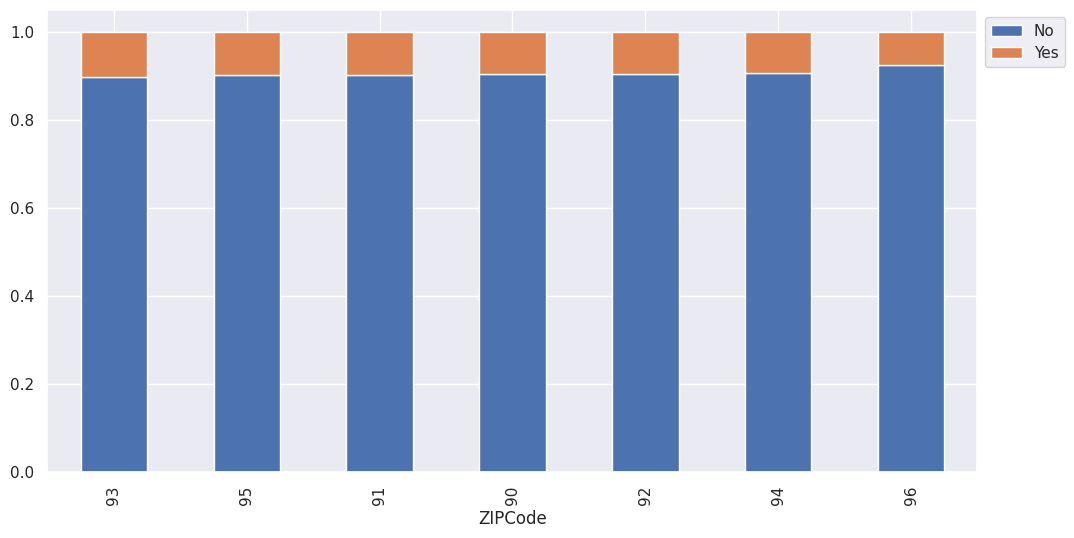

In [ ]:
stacked_barplot(df, "ZIPCode", "Personal_Loan")

Zip Code doesn't seem to have much of an effect on likelihood of taking out a personal loan - about 10-11% of customers took out a loan across all zip codes (with the exception of Zip Codes starting with 96, where only 3 customers took out a loan or 7.5%).

### Personal_Loan vs Family Size

Personal_Loan    No  Yes   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


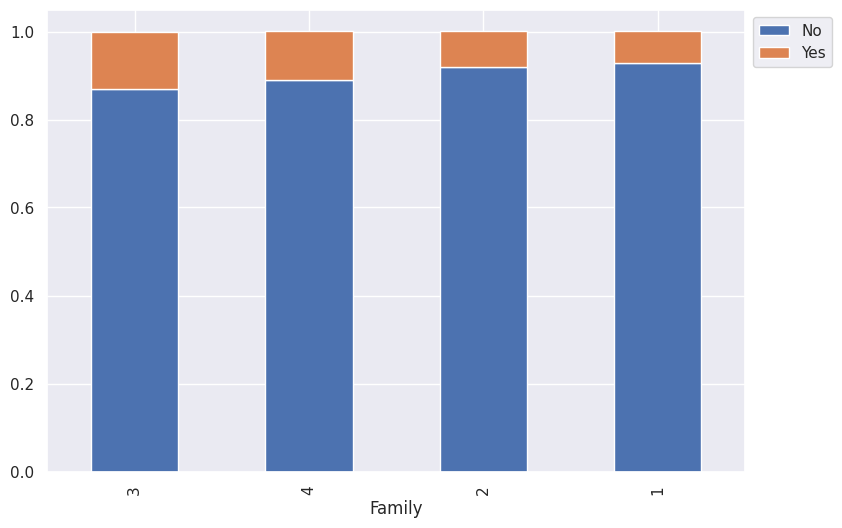

In [ ]:
stacked_barplot(df, "Family", "Personal_Loan")

* Familes with 3 or 4 members were more likely to take out a loan when offered last time

### Personal_Loan vs Education

Personal_Loan            No  Yes   All
Education                             
All                    4520  480  5000
Advanced/Professional  1296  205  1501
Graduate               1221  182  1403
Undergrad              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


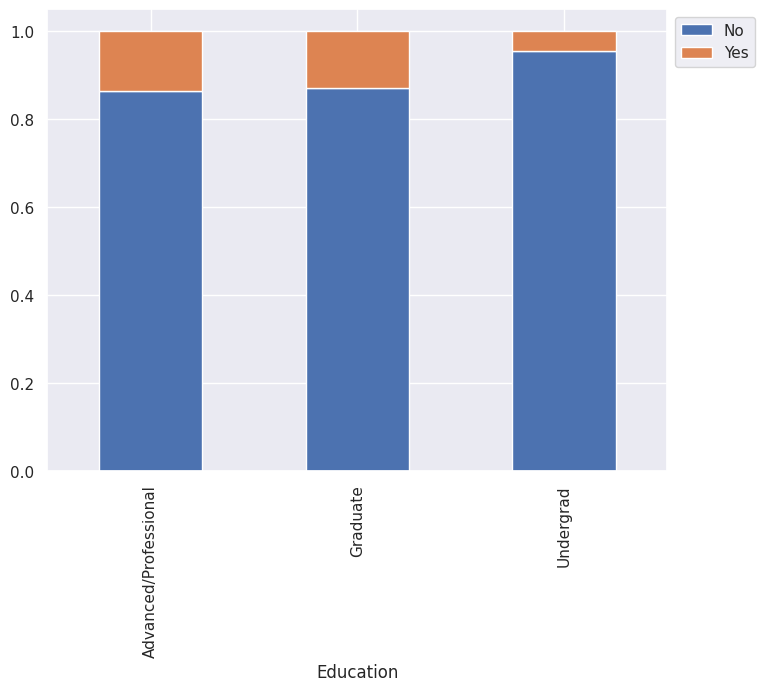

In [ ]:
stacked_barplot(df, "Education", "Personal_Loan")

* Overall, less than 10% of customers accepted a personal loan in the previously
* Customers with Professional and Graduate degrees seem to be more comfortable taking out personal loans: 13-14% of them accepted the offer vs just 4% of the customers with Undegraduate degree.

### Personal_Loan vs Securities Account

Personal_Loan         No  Yes   All
Securities_Account                 
All                 4520  480  5000
No                  4058  420  4478
Yes                  462   60   522
------------------------------------------------------------------------------------------------------------------------


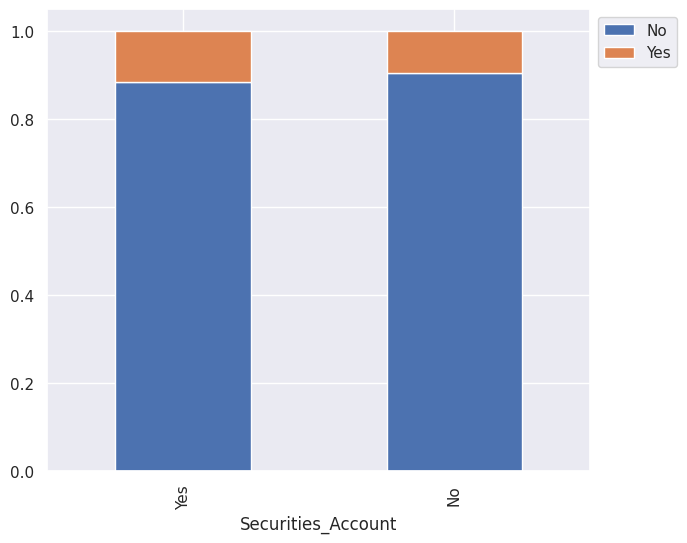

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

* Customers who had securities account were slightly more likely to take out a personal loan last time, although the difference is not very large

### Personal_Loan vs CD Account

Personal_Loan    No  Yes   All
CD_Account                    
All            4520  480  5000
No             4358  340  4698
Yes             162  140   302
------------------------------------------------------------------------------------------------------------------------


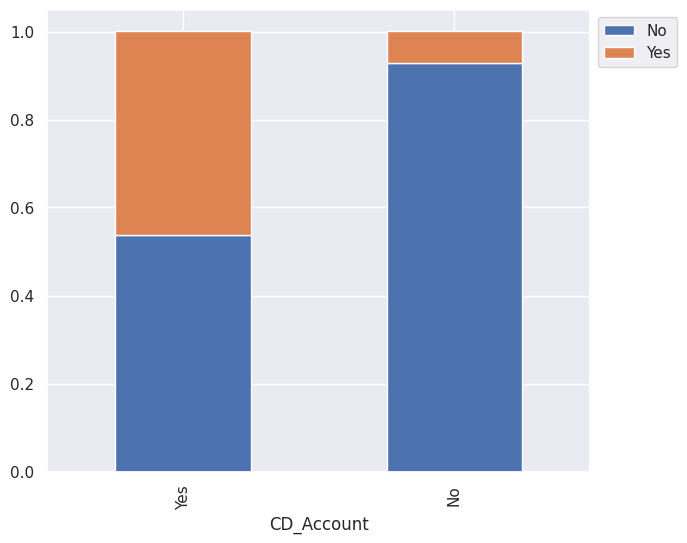

In [ ]:
stacked_barplot(df, "CD_Account", "Personal_Loan")

* Amost half of customers with CD accounts took out a personal loan last time
* Less than 10% of customers without CD account accepted the offer last time


### Personal_Loan vs Online Usage

Personal_Loan    No  Yes   All
Online                        
All            4520  480  5000
Yes            2693  291  2984
No             1827  189  2016
------------------------------------------------------------------------------------------------------------------------


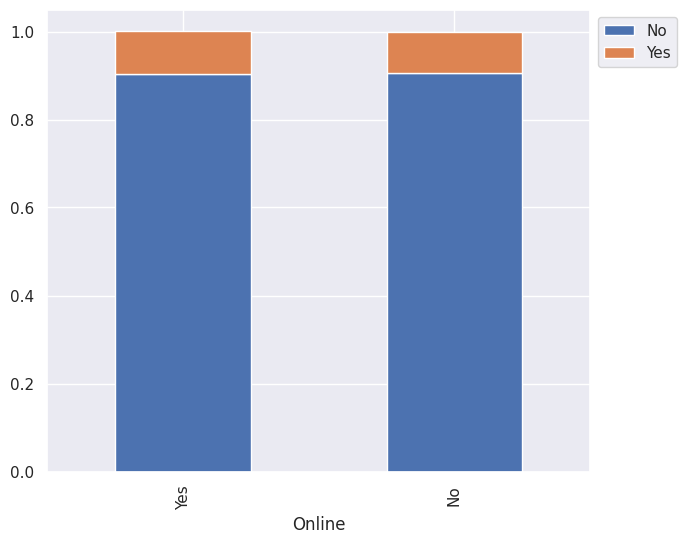

In [ ]:
stacked_barplot(df, "Online", "Personal_Loan")

Online usage doesn't seem to affect whether or not a customer would take out a personal loan

### Personal_Loan vs Credit Card

Personal_Loan    No  Yes   All
CreditCard                    
All            4520  480  5000
No             3193  337  3530
Yes            1327  143  1470
------------------------------------------------------------------------------------------------------------------------


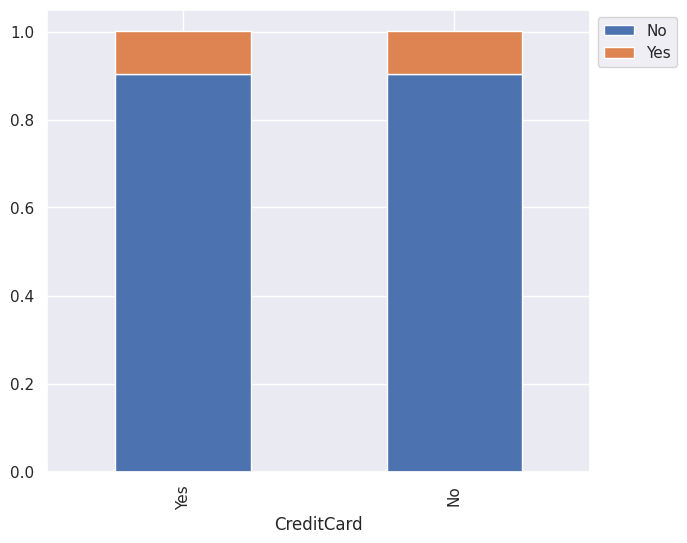

In [ ]:
stacked_barplot(df, "CreditCard", "Personal_Loan")

* Having credit cards from other banks doesn't seem to affect the likelihood of customer taking out a personal loan

### Personal_Loan vs Mortgage

<Axes: xlabel='Personal_Loan', ylabel='Mortgage'>

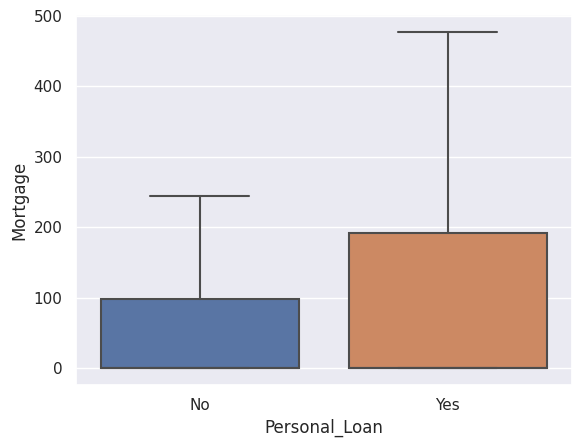

In [ ]:
sns.boxplot(x = df["Personal_Loan"], y = df["Mortgage"], showfliers=False)



Customers who took out a loan had tended to a larger mortgage

### Personal_Loan vs Age

<Axes: xlabel='Personal_Loan', ylabel='Age'>

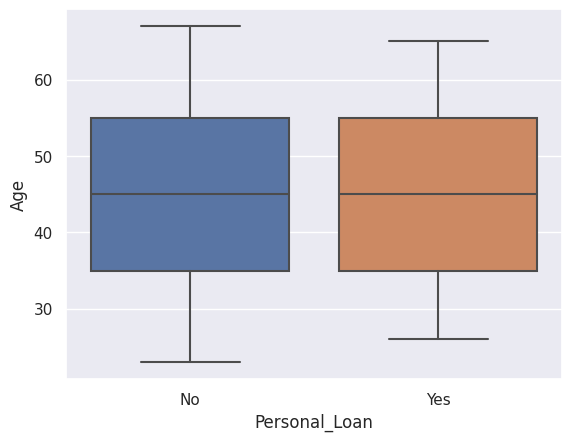

In [ ]:
sns.boxplot(x = df["Personal_Loan"], y = df["Age"], showfliers=True)

Seems that customer's interest in purchasing a mortgage doesn't depend on age

### Personal_Loan vs Professional Experience

<Axes: xlabel='Personal_Loan', ylabel='Experience'>

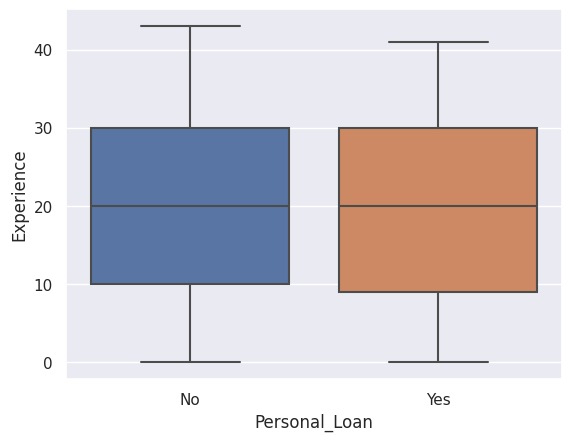

In [ ]:
sns.boxplot(x = df["Personal_Loan"], y = df["Experience"], showfliers=True)

Seems that customer's interest in purchasing a mortgage doesn't depend on professional experience

### Personal_Loan vs Income

<Axes: xlabel='Personal_Loan', ylabel='Income'>

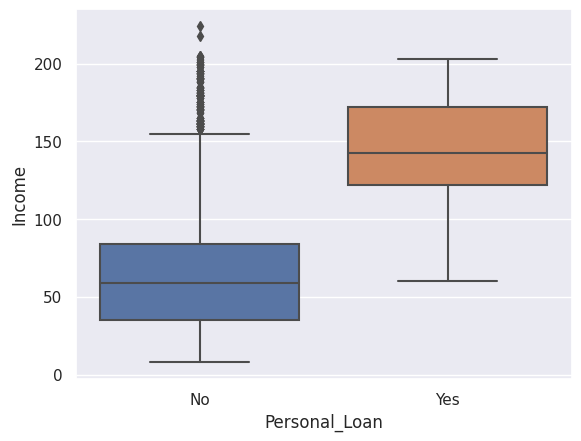

In [ ]:
sns.boxplot(x = df["Personal_Loan"], y = df["Income"], showfliers=True)

Customers with higher income were much more likely to take out a loan

### Personal_Loan vs CCAvg

<Axes: xlabel='Personal_Loan', ylabel='CCAvg'>

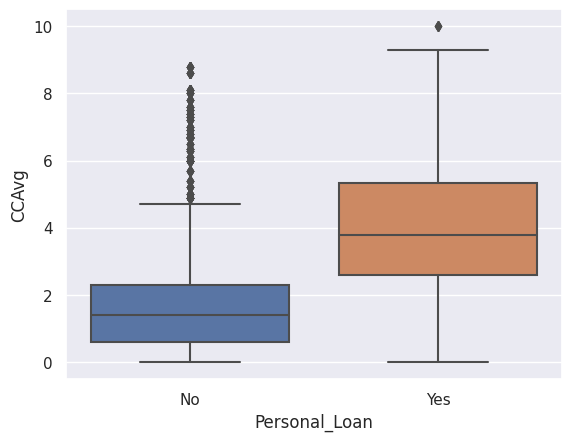

In [ ]:
sns.boxplot(x = df["Personal_Loan"], y = df["CCAvg"], showfliers=True)

Customers with higher credit card spend were much more likely to take out a loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Experience column is tightly correlated with Age, keeping it will introduce bias into the model, so dropping it
df = df.drop(["Experience"], axis=1)

In [ ]:
# create dummy variables
dummy_df = pd.get_dummies(
    df,
    columns=[
        "ZIPCode",
        "Education",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
    ],
    drop_first=True,
)
dummy_df.head()

,Age,Income,Family,CCAvg,Mortgage,Personal_Loan,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Graduate,Education_Advanced/Professional,Securities_Account_Yes,CD_Account_Yes,Online_Yes,CreditCard_Yes
0,25,49,4,1.6,0,No,1,0,0,0,0,0,0,0,1,0,0,0
1,45,34,3,1.5,0,No,0,0,0,0,0,0,0,0,1,0,0,0
2,39,11,1,1.0,0,No,0,0,0,1,0,0,0,0,0,0,0,0
3,35,100,1,2.7,0,No,0,0,0,1,0,0,1,0,0,0,0,0
4,35,45,4,1.0,0,No,1,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
#  separate target variable from the data set, convert type of target variable into numeric
X = dummy_df.drop("Personal_Loan", axis=1)
y = dummy_df["Personal_Loan"].replace({'No':0,'Yes':1}).astype('int64')

In [ ]:
# Split data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 17) (1500, 17)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

* Bank's objective here is to identify which customers can be converted from liability to asset customers. This means that we should focus on minimizing false negatives in our prediction, i.e. minimizing instances where we predict that customer is not likely to purchase a loan while this in fact would be willing to purchase a loan.
* We will focus on maximizing the *Recall* to minimize false negatives.

In [ ]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
def get_performance_measures(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#### Model Building

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.90, 1: 0.10}, random_state=1
)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, random_state=1)

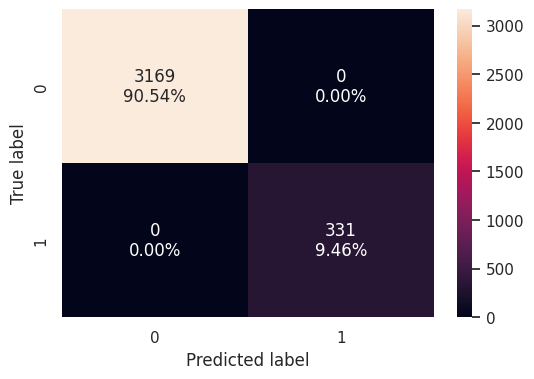

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* This suggests that model is likely overfitting the data, and won't perform as well on the test data.

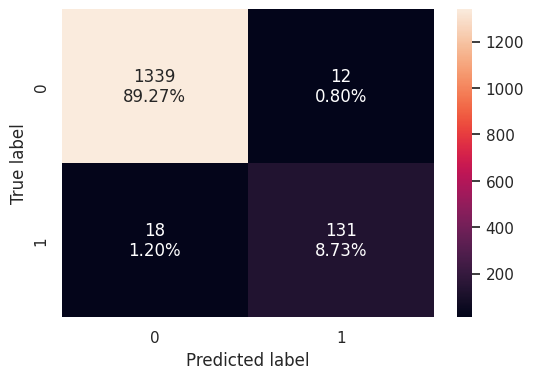

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8791946308724832


The recall score on the test data is 88%, which is quite good. Lets take a look at the other performance metrics.

In [ ]:
performance_no_pruning = get_performance_measures(model, X_test, y_test)
performance_no_pruning

,Accuracy,Recall,Precision,F1
0,0.98,0.879195,0.916084,0.89726


All three performance measures are good. Let's see if we can simplify the model while retaining or improving performance even further.

#### Visualize Descision Tree

In [ ]:
# creating a list of column names
feature_names = X_train.columns.to_list()

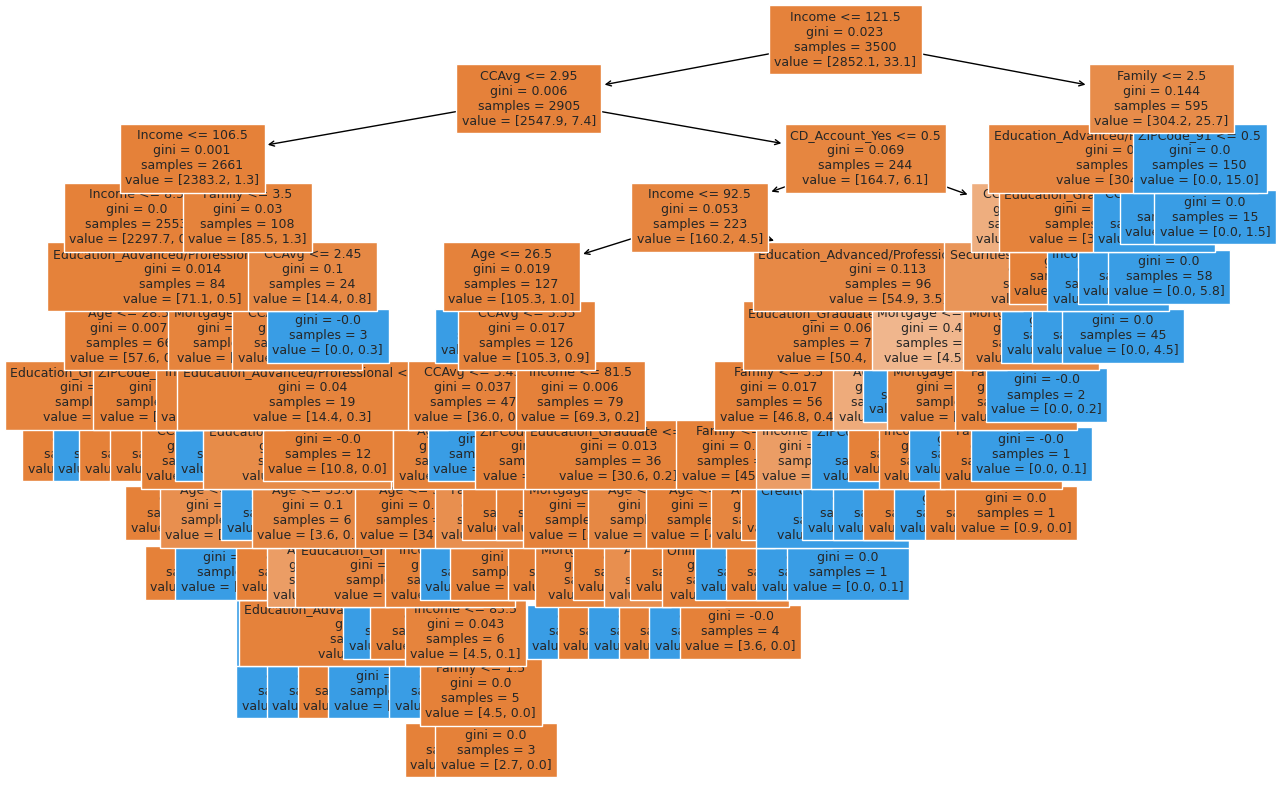

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 121.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- Income <= 8.50
|   |   |   |   |--- weights: [15.30, 0.00] class: 0
|   |   |   |--- Income >  8.50
|   |   |   |   |--- weights: [2282.40, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [8.10, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.20] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- ZIPCode_94 <= 0.50
|   |   |   |   |   |   |   |--- weights: [35.10, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_94 >  0.50
|   |   |   |   |   |   |   |--- weights: [14.40, 0.00] class: 0
|   |   |   |   |--- Education_Advanced/Professional >  0.50
|   |   |   |   |   |--- Mo

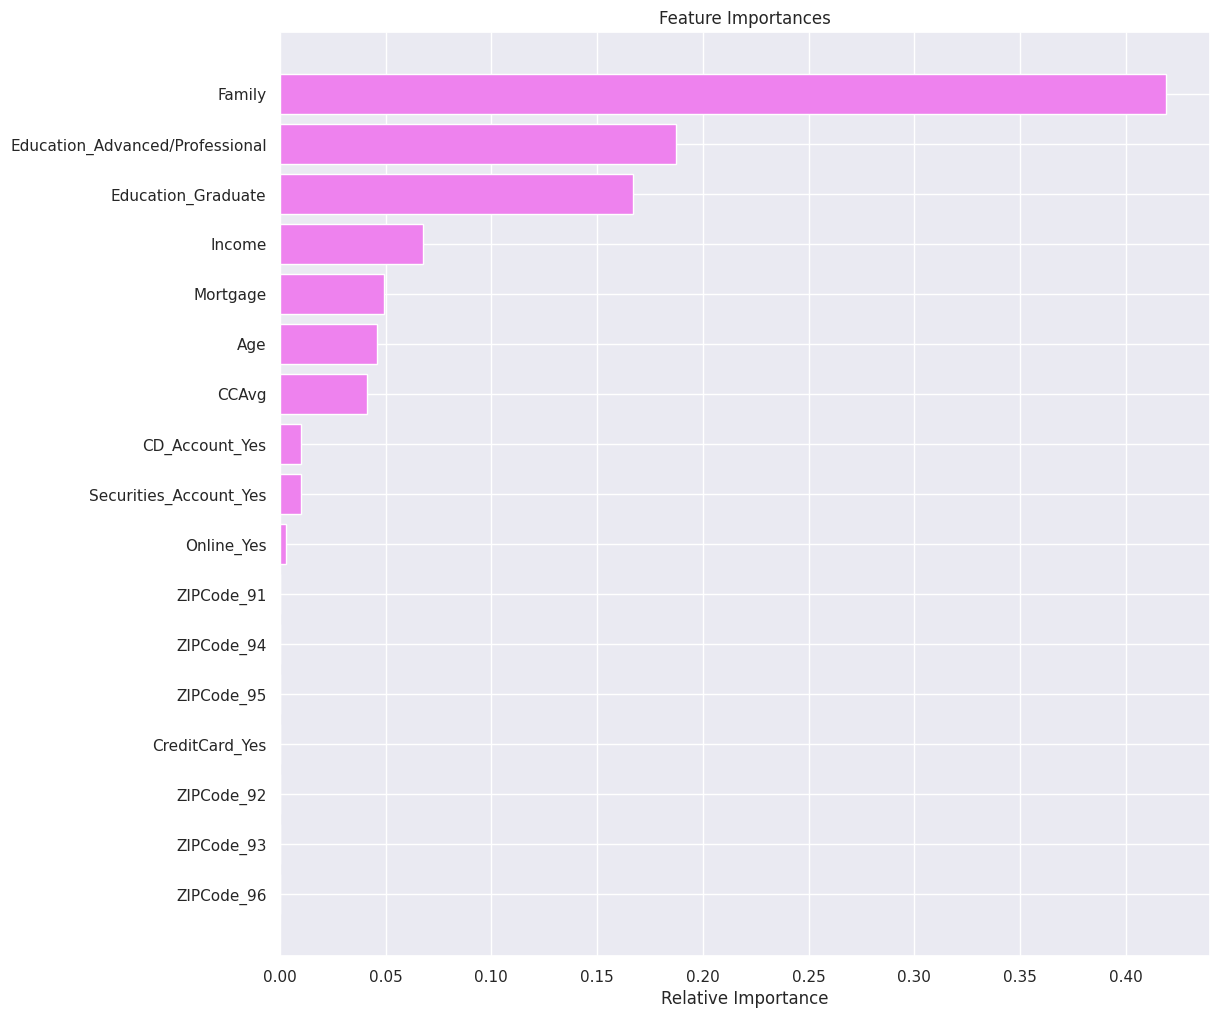

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Family Size is the most important variable for predicting the likelihood of customer purchasing a loan.

### Model Performance Improvement

### Pre-Pruning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.90, 1: 0.10})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.9, 1: 0.1}, criterion='entropy',
                       min_impurity_decrease=1e-05, random_state=1)

#### Model Performance on training set - - Pre-Pruning

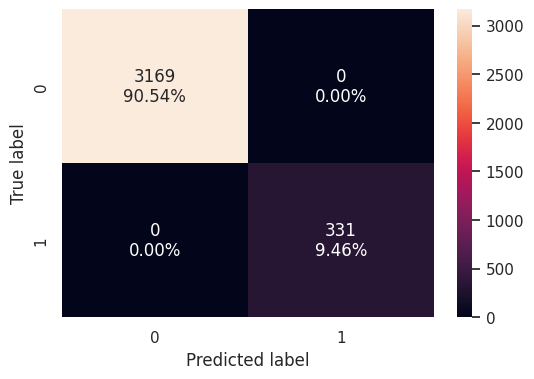

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


#### Model Performance on testing set - Pre-Pruning

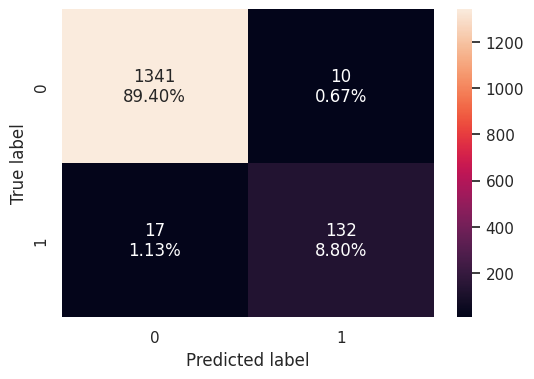

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.8859060402684564


In [ ]:
performance_pre_pruning = get_performance_measures(estimator, X_test, y_test)
performance_pre_pruning

,Accuracy,Recall,Precision,F1
0,0.982,0.885906,0.929577,0.907216


All perfomance measures have improved with pre-pruning

#### Visualizing Descision Tree - Pre-Pruning

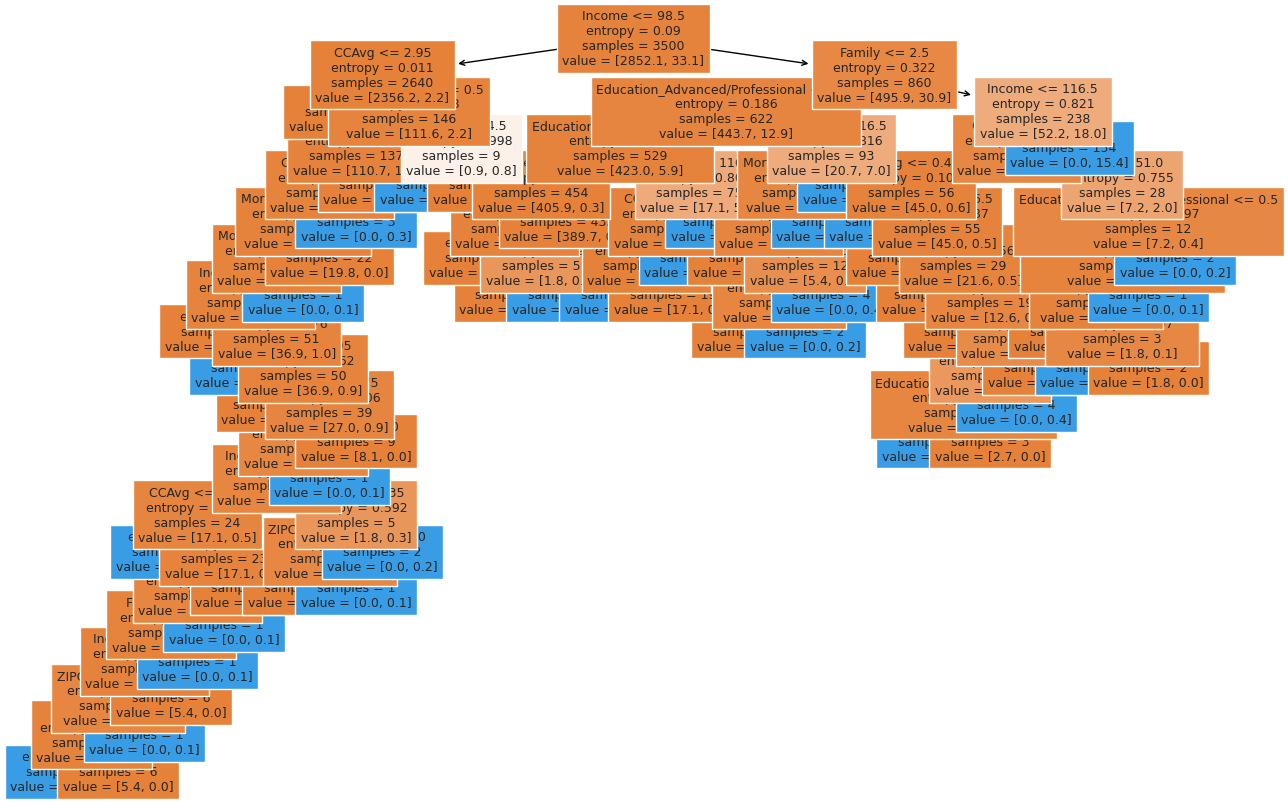

In [ ]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2244.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_Yes <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- CCAvg <= 3.85
|   |   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |   |--- Mortgage <= 48.50
|   |   |   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |   |   |--- weights: [13.50, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |   |   |--- Income <= 70.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.10] class: 1
|   |   |   |   |   |   |   |   |--- Income >  70.00
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |   |   |--- weights: [9.90, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |

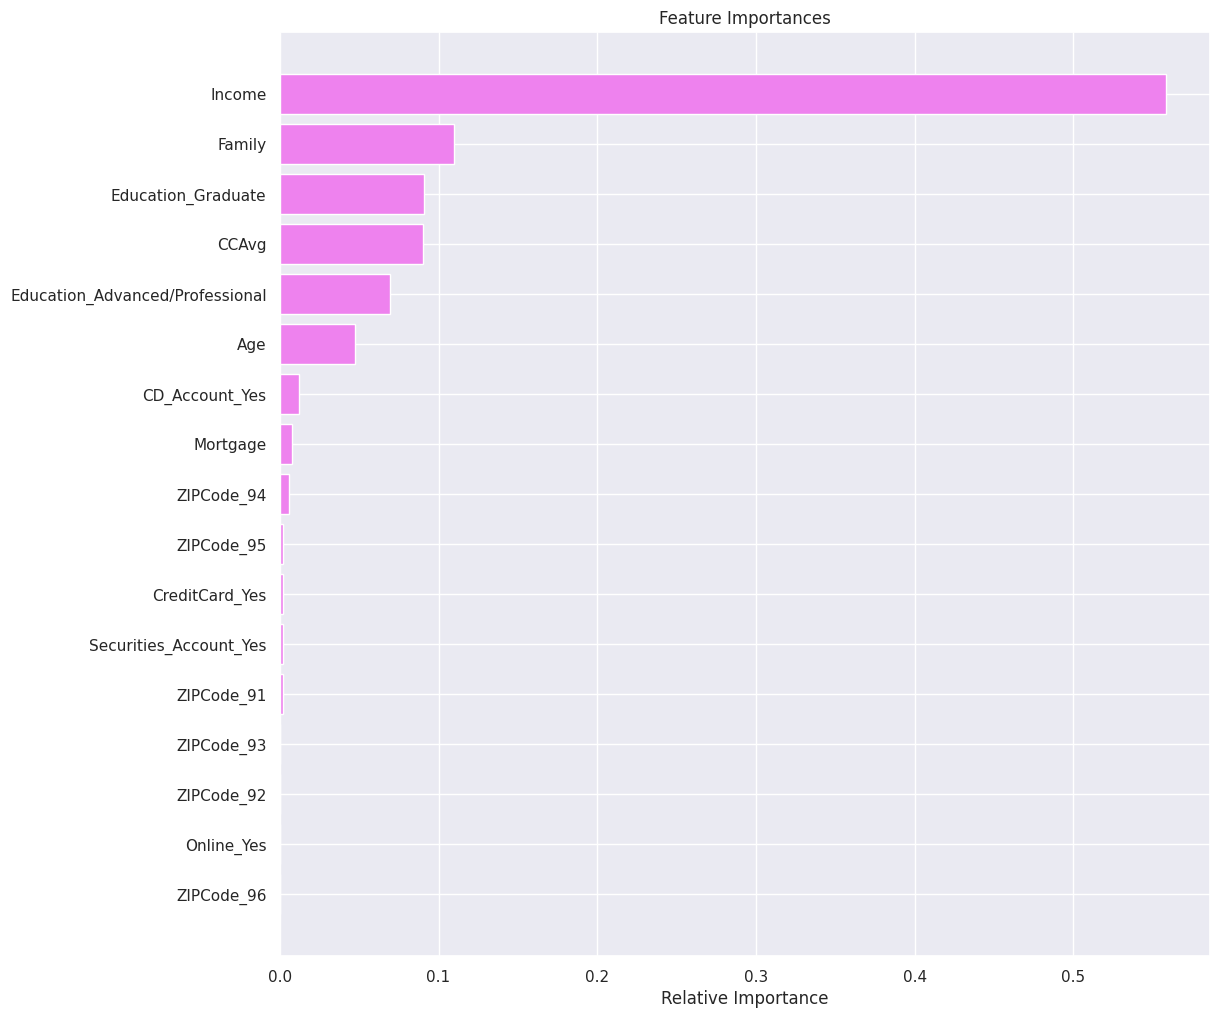

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The Pre-Pruning process yields a much simple tree
* According to this model Income is the most important feature followed by Family size.

### Cost-Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1, #class_weight={0: 0.90, 1: 0.10}
                             )
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


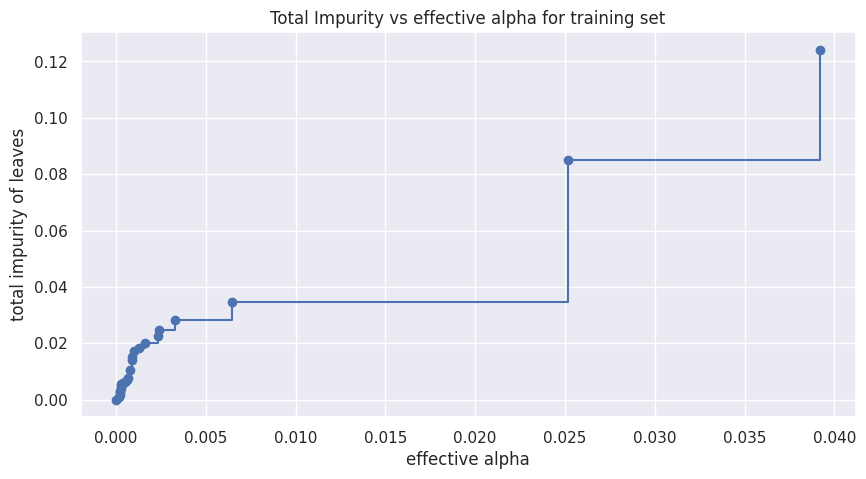

In [ ]:
ig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha,
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


* This results in a trivial tree with obly one node, the last element in clfs and ccp_alphas should be removed

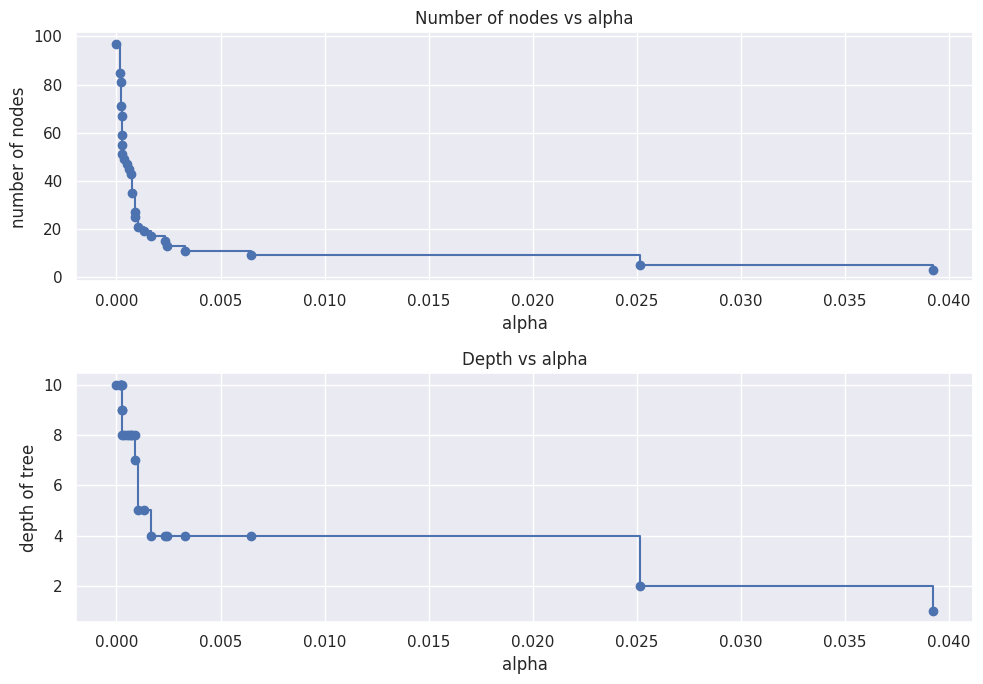

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

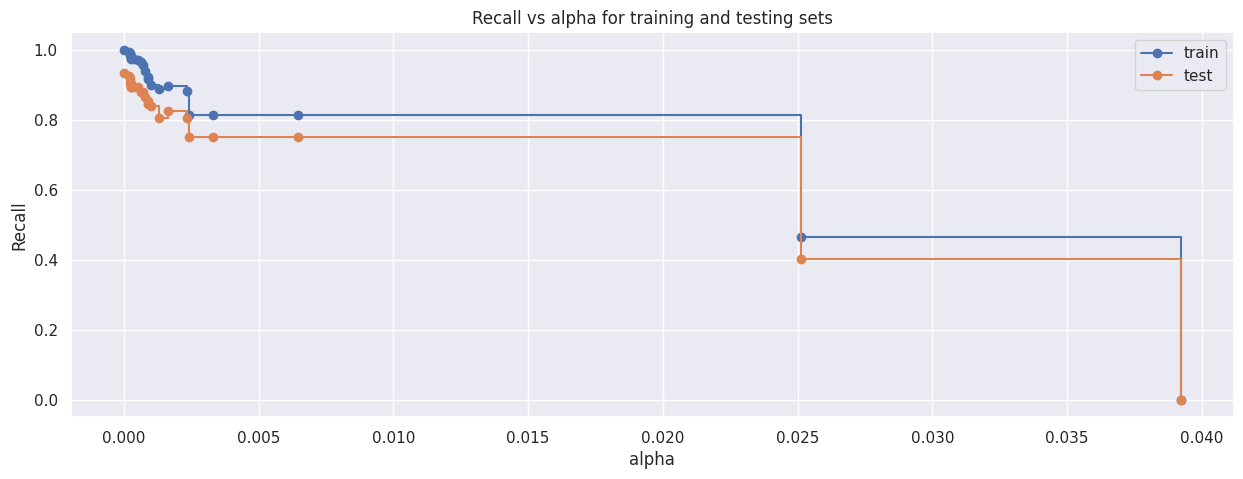

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* Recall values for training and testing data are running parallel to each other for all alphas, they don't converge.
* Recall steadily decreases as alpha increases

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


The most complex model gives the best recall, but this would result in a very complex model. Looking at the alpha vs depth and number of nodes graphs, seems that there is a rapid decrease in the model complexity at alpha ~ 0.001, but the recall values are still above 80%. So along with the best model we will create a less complex model.

In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Performance on Training Set - Cost Complexity Pruning

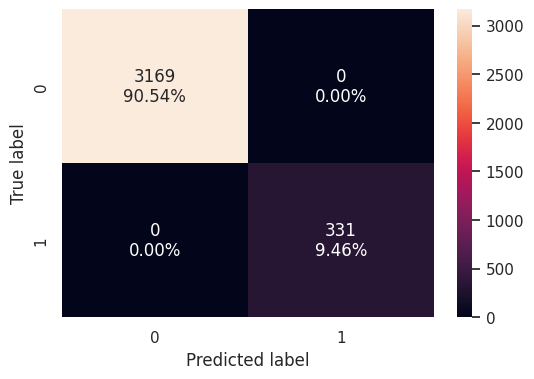

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


#### Performance on Testing Set - Cost Complexity Pruning

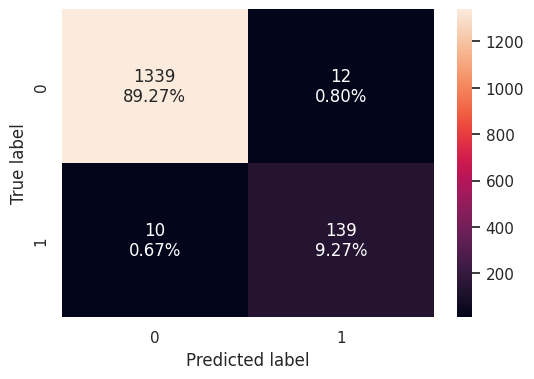

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9328859060402684


In [ ]:
performance_post_pruning = get_performance_measures(best_model, X_test, y_test)
performance_post_pruning

,Accuracy,Recall,Precision,F1
0,0.985333,0.932886,0.92053,0.926667


#### Visualizing Descision Tree - Cost Complexity Pruning

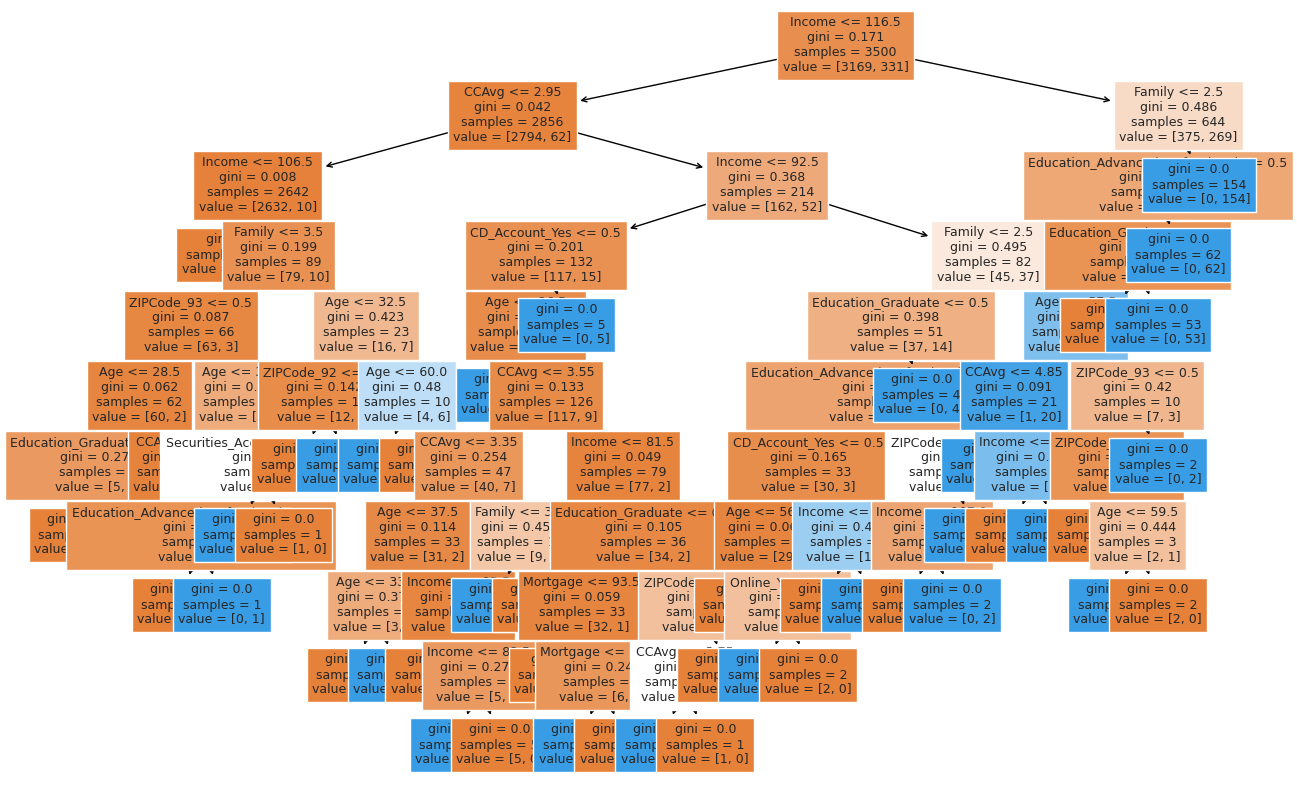

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Advanced/Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZI

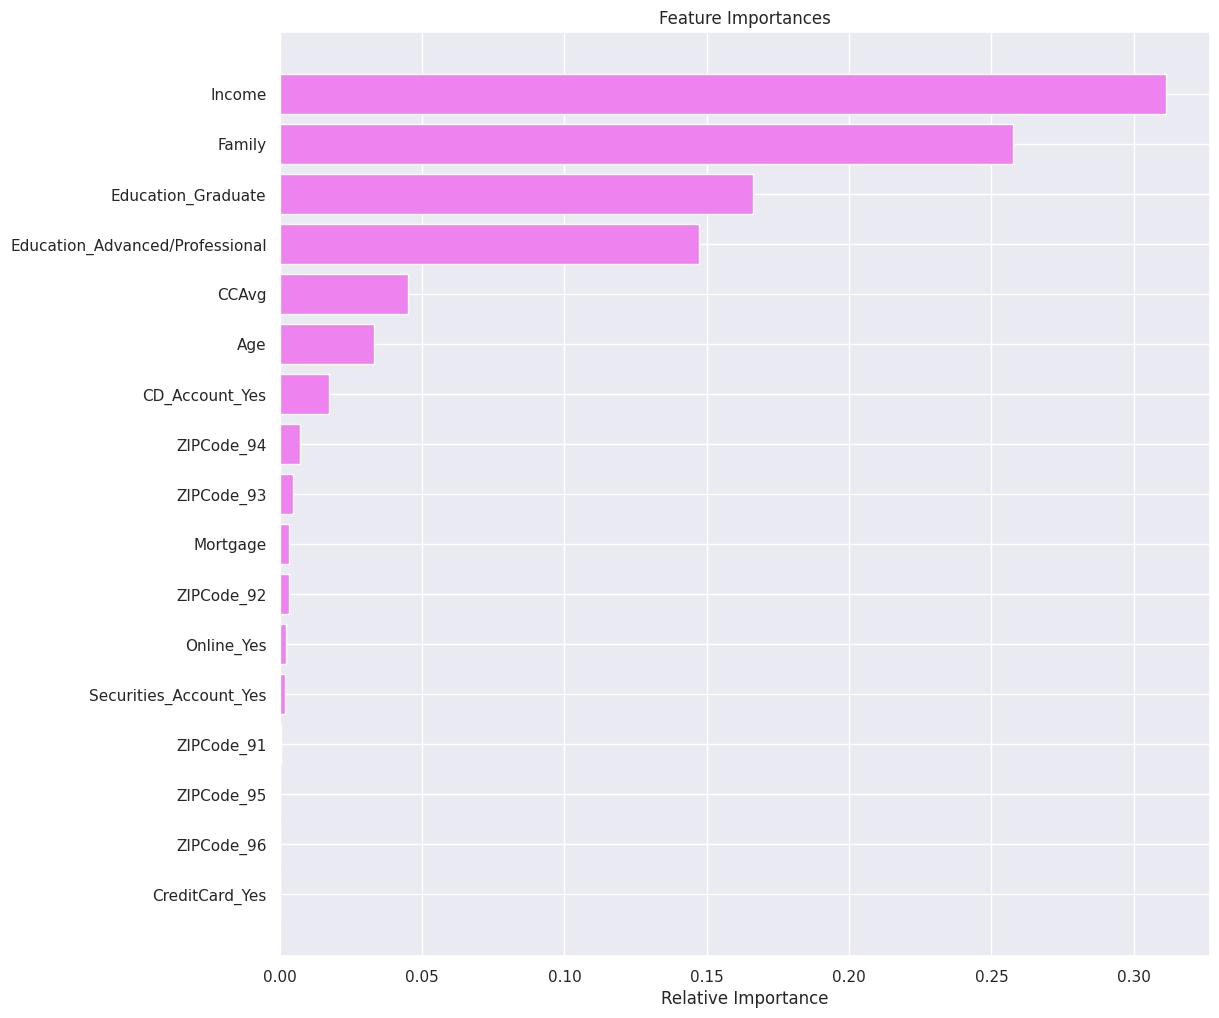

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Family size and having a Professional or Graduate degree are the most important features for this model
* This model looks very similar to the original model without any pruning

#### What if we sacrifieced a bit of recall for the sake of a simpler model?

In [ ]:
# creating the model where we get highest train and test recall
print(np.argsort(recall_test))
index_simple_model = np.argsort(recall_test)[7]
simple_model = clfs[index_simple_model]
print(simple_model)

[23 22 21 20 19 18 16 17 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
DecisionTreeClassifier(ccp_alpha=0.0016474873820495938, random_state=1)


In [ ]:
simple_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0016474873820495938, random_state=1)

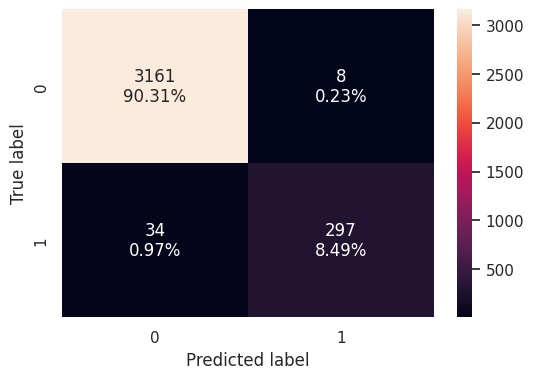

In [ ]:
confusion_matrix_sklearn(simple_model, X_train, y_train)

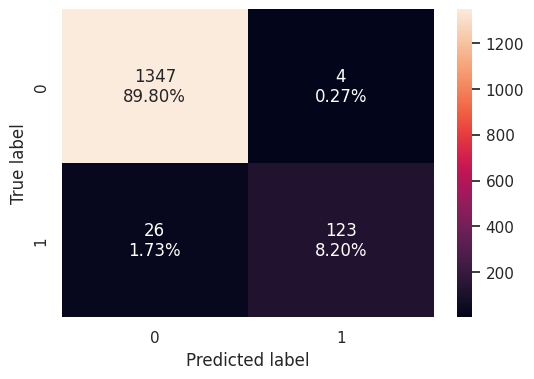

In [ ]:
confusion_matrix_sklearn(simple_model, X_test, y_test)

In [ ]:
performance_post_pruning_simple = get_performance_measures(simple_model, X_test, y_test)
performance_post_pruning

,Accuracy,Recall,Precision,F1
0,0.985333,0.932886,0.92053,0.926667


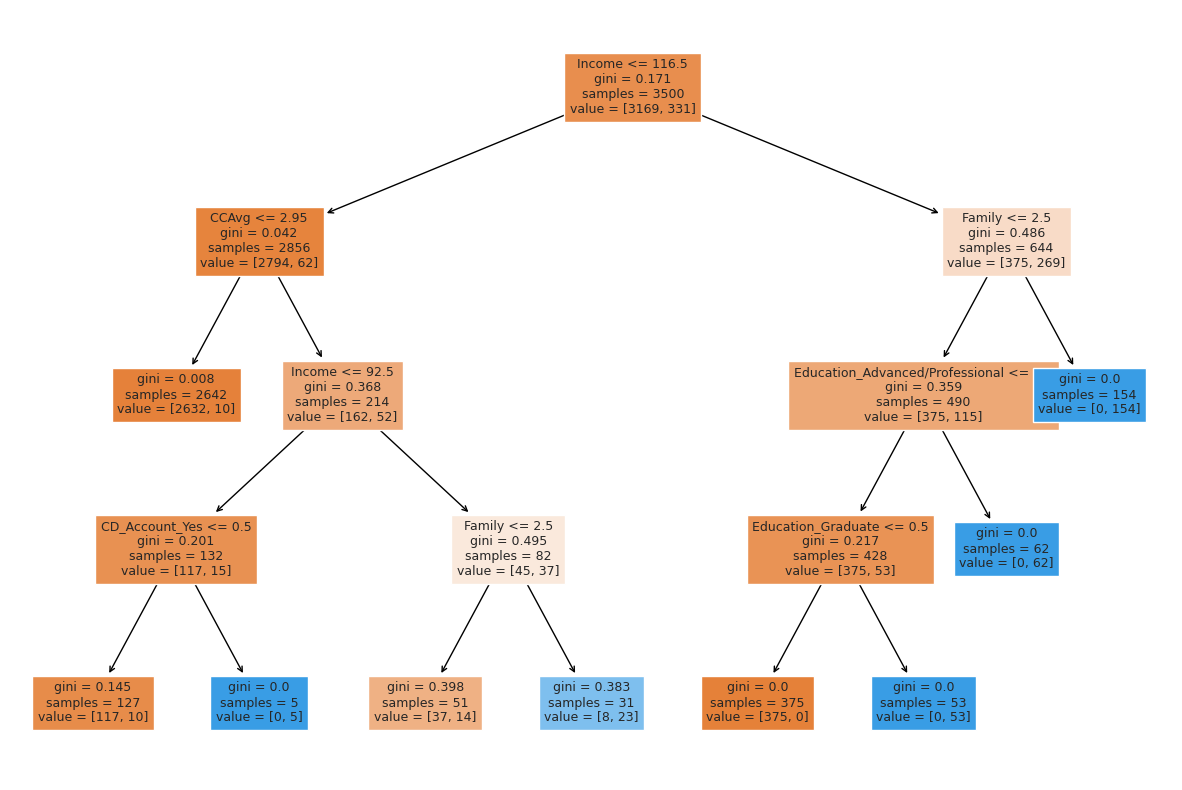

In [ ]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    simple_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(simple_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account_Yes <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account_Yes >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- weights: [8.00, 23.00] class: 1
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_Advanced/Professional <= 0.50
|   |   |   |--- Education_Graduate <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_Graduate >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_Advanced/Professional >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [0.00, 154.00] class: 1



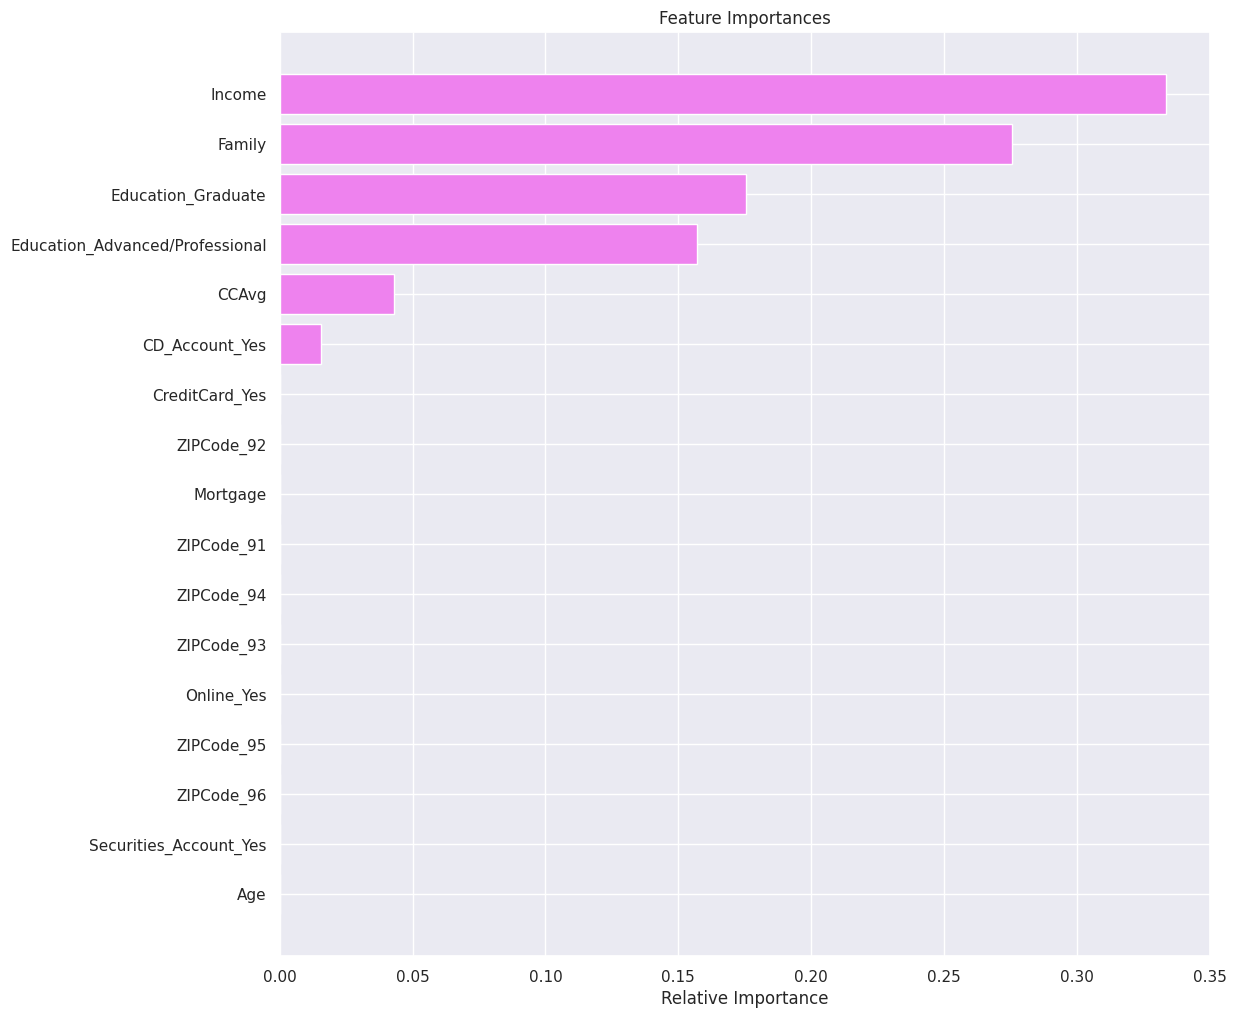

In [ ]:
importances = simple_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Top three important features for this model are Income, Family size, followed by Graduate and Adavnced / professional degrees.

## Model Comparison and Final Model Selection

In [ ]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        performance_no_pruning.T,
        performance_pre_pruning.T,
        performance_post_pruning.T,
        performance_post_pruning_simple.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Decision Tree (Post-Pruning, Simpler model)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),"Decision Tree (Post-Pruning, Simpler model)"
Accuracy,0.980000,0.982000,0.985333,0.980000
Recall,0.879195,0.885906,0.932886,0.825503
Precision,0.916084,0.929577,0.920530,0.968504
F1,0.897260,0.907216,0.926667,0.891304


* Decision tree with post pruning gives the highest recall, as well as accuracy and F1 measures. The precision measure is only slightly worse than pre-pruning model
* Descision Tree with post pruning is complex and hard to interpret.
* Simple model has the lowest recall of the four models, but it is still over 80%, and the other measure are good, so it can be selected as a final model if we care about simplicity, otherwise model with post pruning should be selected as the final model.

## Actionable Insights and Business Recommendations


* Family size, having an Advanced/Professional or Graduate degress are the most important variables in determining if a customer is likely to purchase a loan
* We need to investigate if Logistic regression model performs better for this data set and is easier to use.
* Bank should target customers with income greater than 116.5k and have a family size > 2, or have a Professional or Graduate degree
* Customers in a smaller income bracket are likely to purchase a loan if they have a CD account, or a family size > 2 if their average credit card spend is greater than 2.95k

In [ ]:
%%shell
jupyter nbconvert --to html /content/SL_Full_Code.ipynb

[NbConvertApp] WARNING | pattern '/content/SL_Full_Code.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e

CalledProcessError: ignored

___